## Week2. Optimization Problems & Rydberg Atom Arrays - Task 2

------

We demonstrate the solution of given UD-MIS problem, obtained by
the simulation of quantum annealing with Rydberg machine.

Starting from the imports :

In [6]:
from collections import Counter

from Week2_Rydberg_Atoms.utils import int_to_bin, int_to_bin_str, sanity_check
from julia_run_quantum_annealing import run_annealing, measure, ex_graph, ex_edges, ex_dt
from draw_graph import draw_graph, draw_multi_graph

Drawing the example graph, the radius of the circle is 0.5.

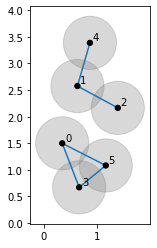

In [2]:
draw_graph(ex_graph, 0.5)

Get the quantum state and measure it for 10,000 times. We order the bit-strings by the number of occurrence.

In [3]:
psi = run_annealing(ex_graph, ex_edges, ex_dt)
samples = [s for s in measure(psi, nshots=10000)]
occurrence = Counter(samples)
max_occ = sorted([k for k in occurrence], key=lambda k: occurrence[k], reverse=True)
print(occurrence)
print(max_occ)

Counter({52: 2898, 28: 2801, 21: 2785, 60: 329, 53: 317, 29: 274, 24: 83, 36: 83, 48: 80, 12: 75, 5: 68, 17: 64, 20: 61, 49: 11, 37: 9, 25: 8, 56: 8, 10: 8, 34: 8, 13: 7, 44: 6, 3: 6, 11: 3, 16: 2, 2: 1, 35: 1, 1: 1, 42: 1, 32: 1, 7: 1})
[52, 28, 21, 60, 53, 29, 24, 36, 48, 12, 5, 17, 20, 49, 37, 25, 56, 10, 34, 13, 44, 3, 11, 16, 2, 35, 1, 42, 32, 7]


We plot the measured bitstrings by the highlights in the graph. Bitstrings observed less than 10 times are ignored.

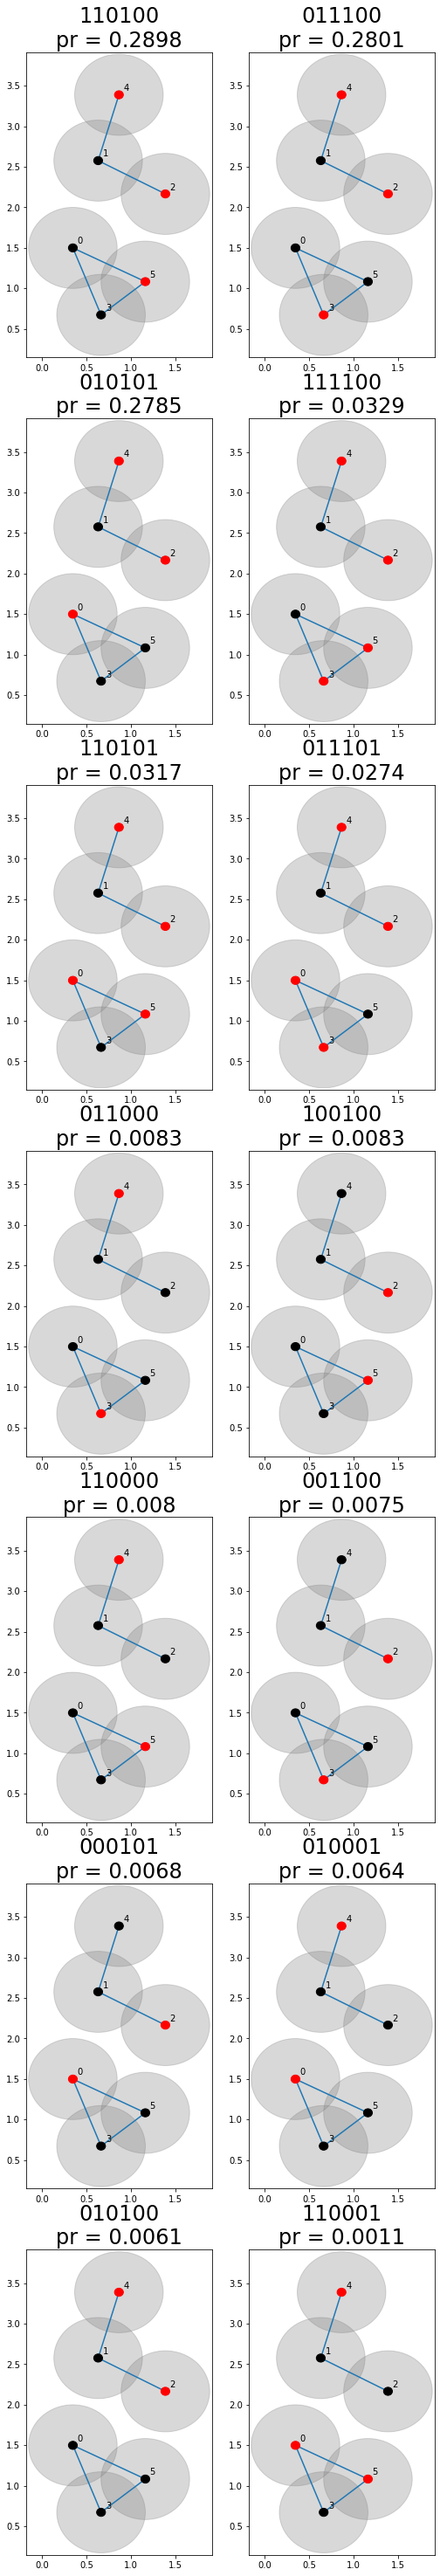

In [5]:
ans = [int_to_bin(m, len(ex_graph)) for m in max_occ if occurrence[m] > 10]
titles = [f"{int_to_bin_str(m, len(ex_graph))}\npr = {occurrence[m]/10000}" for m in max_occ  if occurrence[m] > 10]
draw_multi_graph(ex_graph, 0.5, answer_list=ans, titles=titles)

We see that the first three plots have 3 vertices for each, and no violations. However, the 4th one has a violation,
so it is not an independent set.

Knowing that the size of maximal independent set is 3,
We calculate the probabilities to find the optimal, violated, and sub-optimal solutions.


In [9]:
num_violation = 0
num_suboptimal = 0
num_optimal = 0
for m in max_occ:
    ans = int_to_bin(m, len(ex_graph))
    v, n = sanity_check(ex_graph, radius=0.5, answer=ans)
    if v > 0:
        num_violation += occurrence[m]
    elif n < 3:
        num_suboptimal += occurrence[m]
    elif n == 3:
        num_optimal += occurrence[m]
    else:
        raise RuntimeError
print(f"probability to find optimal answers    : {num_optimal/10000}")
print(f"probability to find invalid answers    : {num_violation/10000}")
print(f"probability to find suboptimal answers : {num_suboptimal/10000}")

probability to find optimal answers    : 0.8484
probability to find invalid answers    : 0.0975
probability to find suboptimal answers : 0.0541
